In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\My Data\Downloads\Software_Professional_Salaries.csv\Software_Professional_Salaries.csv")
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
0,3.8,Sasken,Android Developer,400000,3,Bangalore
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore


In [5]:
df.describe()

,Rating,Salary,Salaries Reported
count,22774.000000,2.277400e+04,22774.000000
mean,3.918249,6.953606e+05,1.855625
std,0.519676,8.843263e+05,6.823078
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [7]:
df.info

<bound method DataFrame.info of        Rating                      Company Name                 Job Title  \
0         3.8                            Sasken         Android Developer   
1         4.5  Advanced Millennium Technologies         Android Developer   
2         4.0                         Unacademy         Android Developer   
3         3.8                SnapBizz Cloudtech         Android Developer   
4         4.4            Appoids Tech Solutions         Android Developer   
...       ...                               ...                       ...   
22769     4.7                  Expert Solutions             Web Developer   
22770     4.0           Nextgen Innovation Labs             Web Developer   
22771     4.1                           Fresher  Full Stack Web Developer   
22772     4.1                         Accenture  Full Stack Web Developer   
22773     3.8                   Thomson Reuters   Associate Web Developer   

        Salary  Salaries Reported   Locatio

In [9]:
df.isnull().sum()

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
dtype: int64

In [11]:
df.isnull().sum().sum()

1

In [13]:
df["Company Name"].mode()

0    Tata Consultancy Services
Name: Company Name, dtype: object

In [15]:
df['Company Name'].fillna("Tata Consultancy Services",inplace=True)
df.isnull().sum()


Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
dtype: int64

In [17]:
job_role_counts = df['Job Title'].value_counts()
print(job_role_counts)

top_job_roles = df['Job Title'].value_counts().head(10)

Job Title
Software Development Engineer          2351
Android Developer                      2029
Software Development Engineer (SDE)    1614
Front End Developer                    1412
Test Engineer                          1314
                                       ... 
Java and J2EE Developer                   1
Techlead Java                             1
Java Andriod Developer                    1
Java Deceloper                            1
Associate Web Developer                   1
Name: count, Length: 1084, dtype: int64


In [19]:
top_job_roles = df['Job Title'].value_counts().head(10)
top_job_roles

Job Title
Software Development Engineer                   2351
Android Developer                               2029
Software Development Engineer (SDE)             1614
Front End Developer                             1412
Test Engineer                                   1314
Web Developer                                    853
Software Development Engineer - Intern           771
Software Development Engineer In Test (SDET)     766
Backend Developer                                534
Python Developer                                 485
Name: count, dtype: int64

In [21]:
df["Job Title"].replace({"Software Development Engineer (SDE)":"Software Development Engineer"},inplace=True)

In [23]:
top_job_roles = df['Job Title'].value_counts().head(10)
top_job_roles

Job Title
Software Development Engineer                   3965
Android Developer                               2029
Front End Developer                             1412
Test Engineer                                   1314
Web Developer                                    853
Software Development Engineer - Intern           771
Software Development Engineer In Test (SDET)     766
Backend Developer                                534
Python Developer                                 485
IOS Developer                                    484
Name: count, dtype: int64

In [25]:
df["Job Title"].replace({"Software Development Engineer - Intern":"Software Development Engineer"},inplace=True)

In [27]:
df["Job Title"].replace({"Software Development Engineer In Test (SDET)":"Software Development Engineer"},inplace=True)

In [29]:
top_job_roles = df['Job Title'].value_counts().head(10)
top_job_roles

Job Title
Software Development Engineer    5502
Android Developer                2029
Front End Developer              1412
Test Engineer                    1314
Web Developer                     853
Backend Developer                 534
Python Developer                  485
IOS Developer                     484
Java Developer                    387
Senior IOS Developer              351
Name: count, dtype: int64

In [31]:
top_10_roles = df['Job Title'].value_counts().head(10).index
top_10_roles

Index(['Software Development Engineer', 'Android Developer',
       'Front End Developer', 'Test Engineer', 'Web Developer',
       'Backend Developer', 'Python Developer', 'IOS Developer',
       'Java Developer', 'Senior IOS Developer'],
      dtype='object', name='Job Title')

In [33]:
df_top_roles = df[df['Job Title'].isin(top_10_roles)]

In [35]:
avg_salary_by_role = df_top_roles.groupby('Job Title')['Salary'].mean()
avg_salary_by_role

Job Title
Android Developer                508105.857072
Backend Developer                663233.617978
Front End Developer              579359.388102
IOS Developer                    598839.735537
Java Developer                   447503.875969
Python Developer                 487069.030928
Senior IOS Developer             956468.148148
Software Development Engineer    757990.479099
Test Engineer                    502066.435312
Web Developer                    439625.303634
Name: Salary, dtype: float64

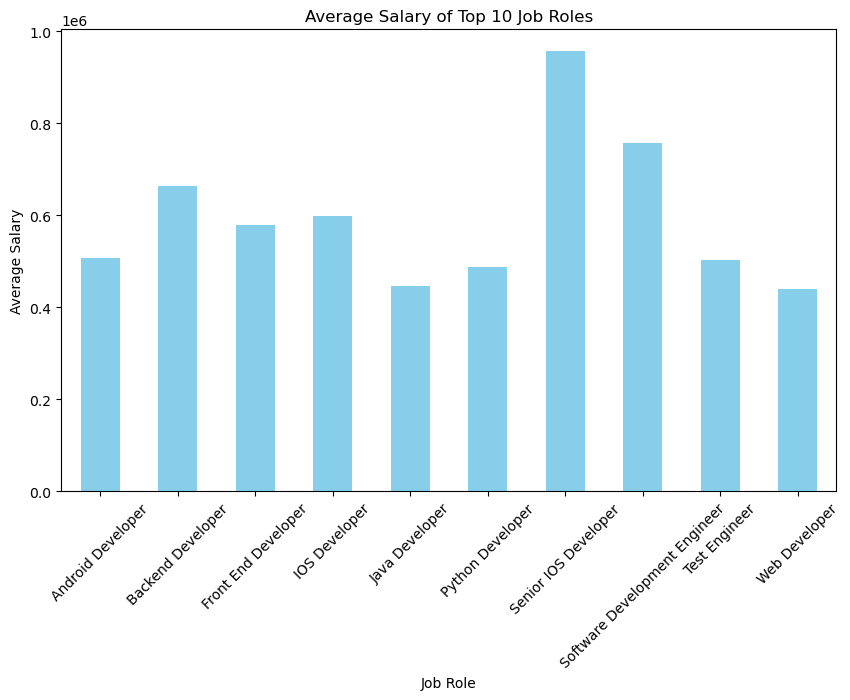

In [37]:
plt.figure(figsize=(10, 6))
avg_salary_by_role.plot(kind='bar', color='skyblue')
plt.title('Average Salary of Top 10 Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

In [38]:
location_counts = df_top_roles.groupby(['Job Title', 'Location']).size().unstack(fill_value=0)
location_counts

Location,Bangalore,Chennai,Hyderabad,Jaipur,Kerala,Kolkata,Madhya Pradesh,Mumbai,New Delhi,Pune
Job Title,,,,,,,,,,
Android Developer,535,187,180,0,0,0,0,0,790,337
Backend Developer,200,39,43,0,0,0,0,0,208,44
Front End Developer,501,180,199,0,0,0,0,0,333,199
IOS Developer,162,0,55,0,0,0,0,0,188,79
Java Developer,0,178,209,0,0,0,0,0,0,0
Python Developer,234,88,163,0,0,0,0,0,0,0
Senior IOS Developer,109,0,52,0,0,0,0,0,146,44
Software Development Engineer,1469,423,757,62,77,129,126,500,1294,665
Test Engineer,841,0,473,0,0,0,0,0,0,0


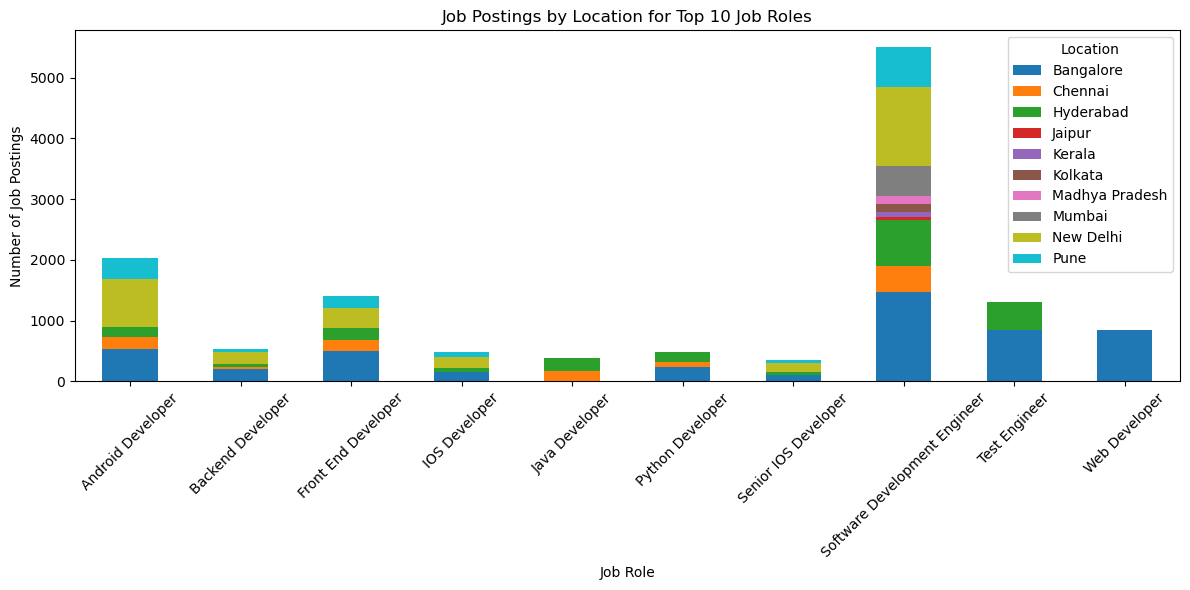

In [41]:
location_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Job Postings by Location for Top 10 Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

In [47]:
company_counts = df_top_roles['Company Name'].value_counts().head(10)
company_counts

Company Name
Tata Consultancy Services         74
Amazon                            59
Infosys                           48
Google                            48
Cognizant Technology Solutions    45
Fresher                           44
IBM                               41
Wipro                             41
ABC                               41
First Student                     39
Name: count, dtype: int64

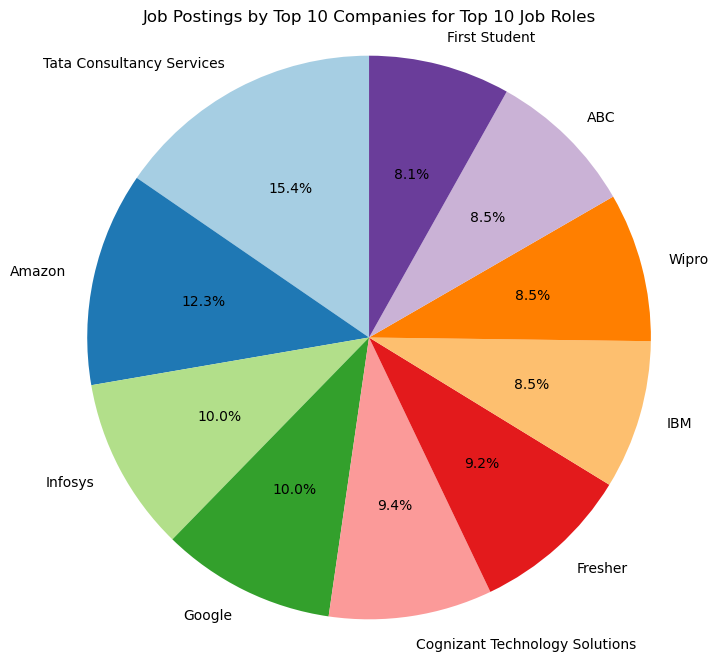

In [51]:
plt.figure(figsize=(8, 8))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Job Postings by Top 10 Companies for Top 10 Job Roles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()